

<center><h1>Normal Distribution & Central Limit Theorem</h1></center>



Its understandable that the Central Limit Theorem (CLT) can seem a bit confusing.  The goal of this notebook is to demystify the CLT by having you write an algorithm that actually uses sampling to approximate a normal distribution from a non-normally distributed data set. 

In this notebook you will:

1. Run code to generate a non-normal data set.  
1. Create an function to randomly sample subsets of data.
1. Create a data set of the means of each sample.
1. Visualize the distribution of the means of each sample.  


<center><h3>Creating our Dummy Data</h3></center>

We're going to use numpy to create a non-normal distribution.  The easiest way to do this is just to create a uniform distribution!  

**TASKS:** Run the code below to import numpy and set a random seed, and then use numpy to create a uniform distribution with integer values between 0 and 100.

(Hint: For integer values, random.uniform is not our best choice since it generates floats.  Which numpy method should you use to generate a uniform distribution of random integers?)

In [73]:
# Run this cell to import the packages you'll need and set a seed
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Please dont change this--otherwise, you'll get different results from everyone else!
np.random.seed(1547)

(array([ 1019.,   915.,  1000.,  1024.,   973.,   979.,  1057.,  1014.,
         1039.,   980.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

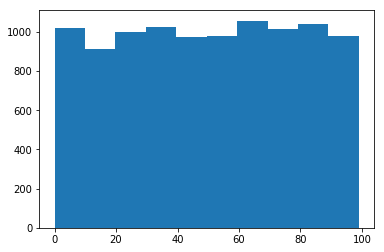

In [23]:
# Create a uniform distribution of 10000 integers between 0 and 100.
non_normal_data = np.random.randint(low=0, high=100, size=10000)

# Use plt.hist() to visualize our the distribution of our dummy data set
plt.hist(non_normal_data)

<center><h3>Creating a Sampling Function</h3></center>

Now that we have created our data set, we'll need to sample from it.  In order to do this, you'll need to create two different functions--a `get_sample` to create random samples of size 'n', and a `create_sample_distribution` function to actually create a sample distribution of size `n` (using our helper function). 

Your `get_sample` function should:

1.  Take a keyword argument for sample size (called 'n' for short)
1.  Randomly grab 'n' samples from the uniform distribution with replacement (any samples selected should NOT be removed from the original data set).
1.  Calculate the mean of the sub-sample and return it.


Your `create_sample_distribution` function should:

1.  Take a keyword argument for size, which will determine the total size of the sample distribution.
1.  Use the `get_sample` helper function to create sample distributions and calculate sample mean.   
1.  Store the sample mean.
1.  Repeat this process until there a distribution of `[size]` sample means exist.  When the data set is complete, return it as a numpy array.  

``` python
def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    pass

def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    pass
```



In [63]:
# Complete the two functions below.  
def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    sample = np.random.choice(dataset, n)
    sample_mean = sample.mean()
    
    return sample_mean
    
def create_sample_distribution(dataset, size=400):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    return np.array([get_sample(dataset) for i in range(size)])


<center><h3>Visualizing our Sample Distribution</h3></center>

Now that we have created our sample distribution, let's visualize it to determine if it's a normal distribution.  

**TASK:** Use matplotlib to visualize our sample distribution.

In [64]:
# Visualize our sample distribution below.
get_sample(non_normal_data)
# Remember, we aliased matplotlib.pyplot as plt!
create_sample_distribution(non_normal_data)

array([ 54.33333333,  45.5       ,  51.36666667,  43.26666667,
        48.33333333,  43.16666667,  47.93333333,  44.26666667,
        44.33333333,  53.3       ,  48.56666667,  43.63333333,
        49.96666667,  57.96666667,  50.83333333,  61.03333333,
        52.13333333,  51.53333333,  50.93333333,  52.9       ,
        52.76666667,  59.6       ,  54.26666667,  47.66666667,
        55.4       ,  43.26666667,  43.66666667,  47.33333333,
        53.06666667,  50.1       ,  48.9       ,  55.26666667,
        51.16666667,  56.03333333,  47.73333333,  55.96666667,
        46.43333333,  52.83333333,  52.46666667,  54.13333333,
        45.8       ,  46.46666667,  45.2       ,  44.46666667,
        52.6       ,  46.7       ,  50.63333333,  45.9       ,
        55.9       ,  51.73333333,  48.06666667,  58.13333333,
        40.56666667,  48.93333333,  49.        ,  50.8       ,
        56.93333333,  53.1       ,  55.5       ,  54.03333333,
        50.63333333,  48.93333333,  50.53333333,  38.4 

<center><h3>Great Job!</h3></center>

Now that you've used the Central Limit Theorem, you're able to create to treat non-normally distributed datasets as normally distributed.  You can now compute Z-scores and compute probabilities for values in these datasets!  

In [65]:
df = pd.read_csv("kaggle_income.csv", encoding='cp1252')

In [66]:
sf = df[df.City == "San Francisco"]

In [67]:
sf_mean = sf.Mean
count = len(sf_mean)
count

77

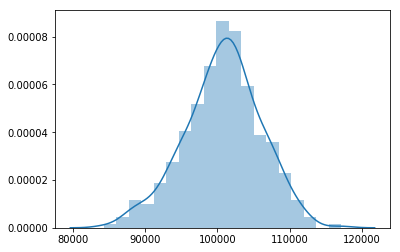

In [71]:
dist = create_sample_distribution(sf_mean)
# plt.hist(dist)
sns.distplot(dist)

In [74]:
z = scipy.stats.zscore(dist)

In [75]:
z

array([  4.51192586e-01,  -1.10101304e-01,   1.43150099e-02,
        -4.04401854e-01,  -4.61573767e-01,   6.34324127e-01,
        -1.93421367e-01,  -8.52296803e-01,   1.20696295e+00,
        -4.38613033e-01,   9.41097175e-01,  -1.09112623e+00,
         9.05043326e-02,  -4.78197465e-01,  -1.92230811e-01,
        -3.50908697e-01,   1.23920877e+00,  -2.52596439e-01,
        -2.63324047e-01,   2.92590290e-01,  -4.54896571e-01,
         6.70966813e-01,   4.38146858e-01,   2.71103579e-01,
        -3.15103810e-01,   3.28212500e-01,  -6.05675210e-01,
         5.99401134e-01,   2.98234411e-01,   2.58026354e-01,
         7.79672819e-01,  -6.73492841e-01,  -2.42872602e+00,
         1.49069967e+00,  -1.67402493e-02,  -4.03885316e-01,
         1.17760849e+00,  -1.76230738e-01,   9.01941092e-01,
         1.23924026e+00,   2.55512957e-01,  -1.80753593e-01,
         7.97767248e-02,  -6.03813925e-02,   3.53844112e-01,
        -2.18022725e+00,   1.04874491e+00,  -5.12459038e-01,
         4.48285345e-02,

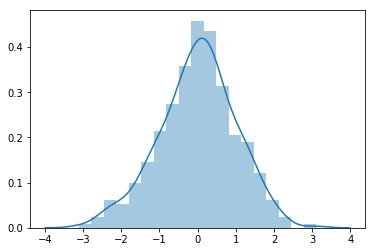

In [76]:
sns.distplot(z)

In [82]:
np.percentile(dist, 25)

97586.858333333323

In [83]:
np.percentile(dist, 50)

100925.95000000001

In [84]:
np.percentile(dist, 75)

104110.04166666666

In [85]:
np.percentile(dist, 99)

111661.37099999998

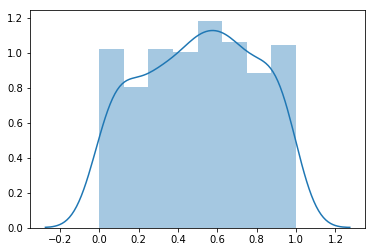

In [106]:
sns.distplot(scipy.stats.norm.cdf(z))

In [107]:
scipy.stats.norm.sf(z)

array([  3.25925376e-01,   5.43835483e-01,   4.94289332e-01,
         6.57041381e-01,   6.77806495e-01,   2.62934657e-01,
         5.76685509e-01,   8.02975310e-01,   1.13723206e-01,
         6.69529024e-01,   1.73327532e-01,   8.62391330e-01,
         4.63943226e-01,   6.83745167e-01,   5.76219294e-01,
         6.37171577e-01,   1.07634098e-01,   5.99709959e-01,
         6.03849587e-01,   3.84917668e-01,   6.75408175e-01,
         2.51120836e-01,   3.30639914e-01,   3.93155685e-01,
         6.23658582e-01,   3.71375499e-01,   7.27634775e-01,
         2.74452711e-01,   3.82762130e-01,   3.98193284e-01,
         2.17791741e-01,   7.49683099e-01,   9.92424011e-01,
         6.80201810e-02,   5.06678081e-01,   6.56851473e-01,
         1.19476363e-01,   5.69943663e-01,   1.83544081e-01,
         1.07628267e-01,   3.99163469e-01,   5.71719505e-01,
         4.68207418e-01,   5.24074061e-01,   3.61727856e-01,
         9.85379690e-01,   1.47147770e-01,   6.95835109e-01,
         4.82121990e-01,

In [111]:
zscores = scipy.stats.zscore(dist)

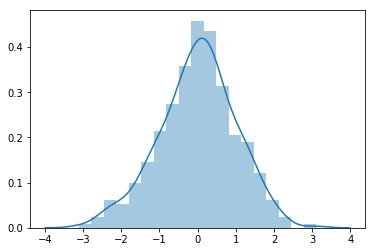

In [112]:
sns.distplot(zscores)

In [114]:
np.percentile(dist, 100)

117136.23333333334